In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aligned_nasdaq10_log_returns.csv to aligned_nasdaq10_log_returns.csv


In [ ]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA
import os
from google.colab import files

In [ ]:
# ✅ Custom function to find best ARIMA(p,d,q) order
def find_best_arima_order(series, p_range=range(0, 4), q_range=range(0, 4), d=0):
    best_aic = float("inf")
    best_order = None
    fallback_order = (1, d, 1)
    warnings.filterwarnings("ignore")

    for p in p_range:
        for q in q_range:
            try:
                order = (p, d, q)
                model = ARIMA(series, order=order).fit()
                if model.aic < best_aic and order != (0, 0, 0):
                    best_aic = model.aic
                    best_order = order
            except:
                continue
    print(f"Best ARIMA order: {best_order}")

    return best_order if best_order else fallback_order

In [ ]:
log_returns = pd.read_csv("aligned_nasdaq10_log_returns.csv", parse_dates=["Date"], index_col="Date")

# Rolling ARIMA parameters
rolling_window = 500
refit_interval = 50
stock = "AAPL"

# Dates for forecast results
forecast_dates = log_returns.index[rolling_window:]
forecast_df = pd.DataFrame(index=forecast_dates)

series = log_returns[stock].dropna()
forecasts = []
last_order = None
last_model = None

for i in range(rolling_window, len(series)):
    train_series = series[i - rolling_window:i]

        # Refit model order every refit_interval
    if (i - rolling_window) % refit_interval == 0 or last_model is None:
                last_order = find_best_arima_order(train_series)
                print("Last order is " , last_order)

    last_model = ARIMA(train_series, order=last_order).fit()
    try:
            pred = last_model.forecast(steps=1)
            value = pred.iloc[0] if len(pred) > 0 else np.nan
            forecasts.append(value)

    except Exception as e:
            forecasts.append(np.nan)
            print(f"Step {i}: ❌ Forecast failed – {e}")

# Store forecast series with proper dates
forecast_series = pd.Series(forecasts, index=forecast_dates[:len(forecasts)])
forecast_df[f"{stock}_forecast"] = forecast_series
single_df = pd.DataFrame({f"{stock}_forecast": forecast_series})
single_df.index.name = "Date"


# 💾 Save forecasts to CSV
filename = f"{stock}_forecast.csv"
single_df.to_csv(filename, index=True)
print(f"✅ Forecast saved to {filename}")
files.download(filename)


Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 2)
Last order is  (1, 0, 2)
Best ARIMA order: (1, 0, 0)
Last order is  (1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(log_returns.columns)

Index(['AMZN', 'AMGN', 'AAPL', 'COST', 'GOOGL', 'META', 'MSFT', 'NFLX', 'SBUX',
       'TSLA'],
      dtype='object')


In [ ]:
log_returns = pd.read_csv("aligned_nasdaq10_log_returns.csv", parse_dates=["Date"], index_col="Date")

# Rolling ARIMA parameters
rolling_window = 500
refit_interval = 50
stock = "AMZN"

# Dates for forecast results
forecast_dates = log_returns.index[rolling_window:]
forecast_df = pd.DataFrame(index=forecast_dates)

series = log_returns[stock].dropna()
forecasts = []
last_order = None
last_model = None

for i in range(rolling_window, len(series)):
    train_series = series[i - rolling_window:i]

        # Refit model order every refit_interval
    if (i - rolling_window) % refit_interval == 0 or last_model is None:
                last_order = find_best_arima_order(train_series)
                print("Last order is " , last_order)

    last_model = ARIMA(train_series, order=last_order).fit()
    try:
            pred = last_model.forecast(steps=1)
            value = pred.iloc[0] if len(pred) > 0 else np.nan
            forecasts.append(value)

    except Exception as e:
            forecasts.append(np.nan)
            print(f"Step {i}: ❌ Forecast failed – {e}")

# Store forecast series with proper dates
forecast_series = pd.Series(forecasts, index=forecast_dates[:len(forecasts)])
forecast_df[f"{stock}_forecast"] = forecast_series
single_df = pd.DataFrame({f"{stock}_forecast": forecast_series})
single_df.index.name = "Date"


# 💾 Save forecasts to CSV
filename = f"{stock}_forecast.csv"
single_df.to_csv(filename, index=True)
print(f"✅ Forecast saved to {filename}")
files.download(filename)

Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (3, 0, 0)
Last order is  (3, 0, 0)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (2, 0, 2)
Last order is  (2, 0, 2)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
log_returns = pd.read_csv("aligned_nasdaq10_log_returns.csv", parse_dates=["Date"], index_col="Date")

# Rolling ARIMA parameters
rolling_window = 500
refit_interval = 50
stock = "AMGN"

# Dates for forecast results
forecast_dates = log_returns.index[rolling_window:]
forecast_df = pd.DataFrame(index=forecast_dates)

series = log_returns[stock].dropna()
forecasts = []
last_order = None
last_model = None

for i in range(rolling_window, len(series)):
    train_series = series[i - rolling_window:i]

        # Refit model order every refit_interval
    if (i - rolling_window) % refit_interval == 0 or last_model is None:
                last_order = find_best_arima_order(train_series)
                print("Last order is " , last_order)

    last_model = ARIMA(train_series, order=last_order).fit()
    try:
            pred = last_model.forecast(steps=1)
            value = pred.iloc[0] if len(pred) > 0 else np.nan
            forecasts.append(value)

    except Exception as e:
            forecasts.append(np.nan)
            print(f"Step {i}: ❌ Forecast failed – {e}")

# Store forecast series with proper dates
forecast_series = pd.Series(forecasts, index=forecast_dates[:len(forecasts)])
forecast_df[f"{stock}_forecast"] = forecast_series
single_df = pd.DataFrame({f"{stock}_forecast": forecast_series})
single_df.index.name = "Date"


# 💾 Save forecasts to CSV
filename = f"{stock}_forecast.csv"
single_df.to_csv(filename, index=True)
print(f"✅ Forecast saved to {filename}")
files.download(filename)

Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (2, 0, 2)
Last order is  (2, 0, 2)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (0, 0, 3)
Last order is  (0, 0, 3)
Best ARIMA order: (0, 0, 3)
Last order is  (0, 0, 3)
Best ARIMA order: (0, 0, 3)
Last order is  (0, 0, 3)
Best ARIMA order: (1, 0, 3)
Last order is  (1, 0, 3)
Best ARIMA order: (1, 0, 3)
Last order is  (1, 0, 3)
Best ARIMA order: (1, 0, 1)
Last order is  (1, 0, 1)
Best ARIMA order: (2, 0, 1)
Last order is  (2, 0, 1)
Best ARIMA order: (1, 0, 1)
Last order is  (1, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 1)
Last order is  (1, 0, 1)
Best ARIMA order: (2, 0, 1)
Last order is  (2, 0, 1)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
log_returns = pd.read_csv("aligned_nasdaq10_log_returns.csv", parse_dates=["Date"], index_col="Date")

# Rolling ARIMA parameters
rolling_window = 500
refit_interval = 50
stock = "COST"

# Dates for forecast results
forecast_dates = log_returns.index[rolling_window:]
forecast_df = pd.DataFrame(index=forecast_dates)

series = log_returns[stock].dropna()
forecasts = []
last_order = None
last_model = None

for i in range(rolling_window, len(series)):
    train_series = series[i - rolling_window:i]

        # Refit model order every refit_interval
    if (i - rolling_window) % refit_interval == 0 or last_model is None:
                last_order = find_best_arima_order(train_series)
                print("Last order is " , last_order)

    last_model = ARIMA(train_series, order=last_order).fit()
    try:
            pred = last_model.forecast(steps=1)
            value = pred.iloc[0] if len(pred) > 0 else np.nan
            forecasts.append(value)

    except Exception as e:
            forecasts.append(np.nan)
            print(f"Step {i}: ❌ Forecast failed – {e}")

# Store forecast series with proper dates
forecast_series = pd.Series(forecasts, index=forecast_dates[:len(forecasts)])
forecast_df[f"{stock}_forecast"] = forecast_series
single_df = pd.DataFrame({f"{stock}_forecast": forecast_series})
single_df.index.name = "Date"


# 💾 Save forecasts to CSV
filename = f"{stock}_forecast.csv"
single_df.to_csv(filename, index=True)
print(f"✅ Forecast saved to {filename}")
files.download(filename)

Best ARIMA order: (2, 0, 2)
Last order is  (2, 0, 2)
Best ARIMA order: (3, 0, 0)
Last order is  (3, 0, 0)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 3)
Last order is  (0, 0, 3)
Best ARIMA order: (0, 0, 3)
Last order is  (0, 0, 3)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 1)
Last order is  (1, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (3, 0, 2)
Last order is  (3, 0, 2)
Best ARIMA order: (2, 0, 2)
Last order is  (2, 0, 2)
Best ARIMA order: (2, 0, 2)
Last order is  (2, 0, 2)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (3, 0, 3)
Last order is  (3, 0, 3)
Best ARIMA order: (1, 0, 3)
Last order is  (1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
log_returns = pd.read_csv("aligned_nasdaq10_log_returns.csv", parse_dates=["Date"], index_col="Date")

# Rolling ARIMA parameters
rolling_window = 500
refit_interval = 50
stock = "GOOGL"

# Dates for forecast results
forecast_dates = log_returns.index[rolling_window:]
forecast_df = pd.DataFrame(index=forecast_dates)

series = log_returns[stock].dropna()
forecasts = []
last_order = None
last_model = None

for i in range(rolling_window, len(series)):
    train_series = series[i - rolling_window:i]

        # Refit model order every refit_interval
    if (i - rolling_window) % refit_interval == 0 or last_model is None:
                last_order = find_best_arima_order(train_series)
                print("Last order is " , last_order)

    last_model = ARIMA(train_series, order=last_order).fit()
    try:
            pred = last_model.forecast(steps=1)
            value = pred.iloc[0] if len(pred) > 0 else np.nan
            forecasts.append(value)

    except Exception as e:
            forecasts.append(np.nan)
            print(f"Step {i}: ❌ Forecast failed – {e}")

# Store forecast series with proper dates
forecast_series = pd.Series(forecasts, index=forecast_dates[:len(forecasts)])
forecast_df[f"{stock}_forecast"] = forecast_series
single_df = pd.DataFrame({f"{stock}_forecast": forecast_series})
single_df.index.name = "Date"


# 💾 Save forecasts to CSV
filename = f"{stock}_forecast.csv"
single_df.to_csv(filename, index=True)
print(f"✅ Forecast saved to {filename}")
files.download(filename)

Best ARIMA order: (1, 0, 3)
Last order is  (1, 0, 3)
Best ARIMA order: (1, 0, 2)
Last order is  (1, 0, 2)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (3, 0, 0)
Last order is  (3, 0, 0)
Best ARIMA order: (3, 0, 0)
Last order is  (3, 0, 0)
Best ARIMA order: (3, 0, 3)
Last order is  (3, 0, 3)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (2, 0, 3)
Last order is  (2, 0, 3)
Best ARIMA order: (3, 0, 2)
Last order is  (3, 0, 2)
Best ARIMA order: (3, 0, 2)
Last order is  (3, 0, 2)
Best ARIMA order: (3, 0, 0)
Last order is  (3, 0, 0)
Best ARIMA order: (2, 0, 2)
Last order is  (2, 0, 2)
Best ARIMA order: (3, 0, 3)
Last order is  (3, 0, 3)
Best ARIMA order: (0, 0, 2)
Last order is  (0, 0, 2)
Best ARIMA order: (3, 0, 3)
Last order is  (3, 0, 3)
Best ARIMA order: (0, 0, 2)
Last order is  (0, 0, 2)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
log_returns = pd.read_csv("aligned_nasdaq10_log_returns.csv", parse_dates=["Date"], index_col="Date")

# Rolling ARIMA parameters
rolling_window = 500
refit_interval = 50
stock = "META"

# Dates for forecast results
forecast_dates = log_returns.index[rolling_window:]
forecast_df = pd.DataFrame(index=forecast_dates)

series = log_returns[stock].dropna()
forecasts = []
last_order = None
last_model = None

for i in range(rolling_window, len(series)):
    train_series = series[i - rolling_window:i]

        # Refit model order every refit_interval
    if (i - rolling_window) % refit_interval == 0 or last_model is None:
                last_order = find_best_arima_order(train_series)
                print("Last order is " , last_order)

    last_model = ARIMA(train_series, order=last_order).fit()
    try:
            pred = last_model.forecast(steps=1)
            value = pred.iloc[0] if len(pred) > 0 else np.nan
            forecasts.append(value)

    except Exception as e:
            forecasts.append(np.nan)
            print(f"Step {i}: ❌ Forecast failed – {e}")

# Store forecast series with proper dates
forecast_series = pd.Series(forecasts, index=forecast_dates[:len(forecasts)])
forecast_df[f"{stock}_forecast"] = forecast_series
single_df = pd.DataFrame({f"{stock}_forecast": forecast_series})
single_df.index.name = "Date"


# 💾 Save forecasts to CSV
filename = f"{stock}_forecast.csv"
single_df.to_csv(filename, index=True)
print(f"✅ Forecast saved to {filename}")
files.download(filename)

Best ARIMA order: (3, 0, 3)
Last order is  (3, 0, 3)
Best ARIMA order: (0, 0, 3)
Last order is  (0, 0, 3)
Best ARIMA order: (0, 0, 3)
Last order is  (0, 0, 3)
Best ARIMA order: (0, 0, 3)
Last order is  (0, 0, 3)
Best ARIMA order: (0, 0, 3)
Last order is  (0, 0, 3)
Best ARIMA order: (1, 0, 2)
Last order is  (1, 0, 2)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 1)
Last order is  (1, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
log_returns = pd.read_csv("aligned_nasdaq10_log_returns.csv", parse_dates=["Date"], index_col="Date")

# Rolling ARIMA parameters
rolling_window = 500
refit_interval = 50
stock = "MSFT"

# Dates for forecast results
forecast_dates = log_returns.index[rolling_window:]
forecast_df = pd.DataFrame(index=forecast_dates)

series = log_returns[stock].dropna()
forecasts = []
last_order = None
last_model = None

for i in range(rolling_window, len(series)):
    train_series = series[i - rolling_window:i]

        # Refit model order every refit_interval
    if (i - rolling_window) % refit_interval == 0 or last_model is None:
                last_order = find_best_arima_order(train_series)
                print("Last order is " , last_order)

    last_model = ARIMA(train_series, order=last_order).fit()
    try:
            pred = last_model.forecast(steps=1)
            value = pred.iloc[0] if len(pred) > 0 else np.nan
            forecasts.append(value)

    except Exception as e:
            forecasts.append(np.nan)
            print(f"Step {i}: ❌ Forecast failed – {e}")

# Store forecast series with proper dates
forecast_series = pd.Series(forecasts, index=forecast_dates[:len(forecasts)])
forecast_df[f"{stock}_forecast"] = forecast_series
single_df = pd.DataFrame({f"{stock}_forecast": forecast_series})
single_df.index.name = "Date"


# 💾 Save forecasts to CSV
filename = f"{stock}_forecast.csv"
single_df.to_csv(filename, index=True)
print(f"✅ Forecast saved to {filename}")
files.download(filename)

Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (2, 0, 0)
Last order is  (2, 0, 0)
Best ARIMA order: (3, 0, 3)
Last order is  (3, 0, 3)
Best ARIMA order: (2, 0, 3)
Last order is  (2, 0, 3)
Best ARIMA order: (3, 0, 3)
Last order is  (3, 0, 3)
Best ARIMA order: (3, 0, 3)
Last order is  (3, 0, 3)
Best ARIMA order: (3, 0, 3)
Last order is  (3, 0, 3)
Best ARIMA order: (3, 0, 3)
Last order is  (3, 0, 3)
Best ARIMA order: (3, 0, 3)
Last order is  (3, 0, 3)
Best ARIMA order: (3, 0, 3)
Last order is  (3, 0, 3)
Best ARIMA order: (3, 0, 2)
Last order is  (3, 0, 2)
Best ARIMA order: (3, 0, 1)
Last order is  (3, 0, 1)
Best ARIMA order: (2, 0, 2)
Last order is  (2,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
log_returns = pd.read_csv("aligned_nasdaq10_log_returns.csv", parse_dates=["Date"], index_col="Date")

# Rolling ARIMA parameters
rolling_window = 500
refit_interval = 50
stock = "NFLX"

# Dates for forecast results
forecast_dates = log_returns.index[rolling_window:]
forecast_df = pd.DataFrame(index=forecast_dates)

series = log_returns[stock].dropna()
forecasts = []
last_order = None
last_model = None

for i in range(rolling_window, len(series)):
    train_series = series[i - rolling_window:i]

        # Refit model order every refit_interval
    if (i - rolling_window) % refit_interval == 0 or last_model is None:
                last_order = find_best_arima_order(train_series)
                print("Last order is " , last_order)

    last_model = ARIMA(train_series, order=last_order).fit()
    try:
            pred = last_model.forecast(steps=1)
            value = pred.iloc[0] if len(pred) > 0 else np.nan
            forecasts.append(value)

    except Exception as e:
            forecasts.append(np.nan)
            print(f"Step {i}: ❌ Forecast failed – {e}")

# Store forecast series with proper dates
forecast_series = pd.Series(forecasts, index=forecast_dates[:len(forecasts)])
forecast_df[f"{stock}_forecast"] = forecast_series
single_df = pd.DataFrame({f"{stock}_forecast": forecast_series})
single_df.index.name = "Date"


# 💾 Save forecasts to CSV
filename = f"{stock}_forecast.csv"
single_df.to_csv(filename, index=True)
print(f"✅ Forecast saved to {filename}")
files.download(filename)

Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (2, 0, 2)
Last order is  (2, 0, 2)
Best ARIMA order: (3, 0, 2)
Last order is  (3, 0, 2)
Best ARIMA order: (2, 0, 3)
Last order is  (2, 0, 3)
Best ARIMA order: (2, 0, 3)
Last order is  (2, 0, 3)
Best ARIMA order: (2, 0, 3)
Last order is  (2, 0, 3)
Best ARIMA order: (3, 0, 2)
Last order is  (3, 0, 2)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (0, 0, 2)
Last order is  (0, 0, 2)
Best ARIMA order: (0, 0, 2)
Last order is  (0, 0, 2)
Best ARIMA order: (0, 0, 2)
Last order is  (0,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
log_returns = pd.read_csv("aligned_nasdaq10_log_returns.csv", parse_dates=["Date"], index_col="Date")

# Rolling ARIMA parameters
rolling_window = 500
refit_interval = 50
stock = "SBUX"

# Dates for forecast results
forecast_dates = log_returns.index[rolling_window:]
forecast_df = pd.DataFrame(index=forecast_dates)

series = log_returns[stock].dropna()
forecasts = []
last_order = None
last_model = None

for i in range(rolling_window, len(series)):
    train_series = series[i - rolling_window:i]

        # Refit model order every refit_interval
    if (i - rolling_window) % refit_interval == 0 or last_model is None:
                last_order = find_best_arima_order(train_series)
                print("Last order is " , last_order)

    last_model = ARIMA(train_series, order=last_order).fit()
    try:
            pred = last_model.forecast(steps=1)
            value = pred.iloc[0] if len(pred) > 0 else np.nan
            forecasts.append(value)

    except Exception as e:
            forecasts.append(np.nan)
            print(f"Step {i}: ❌ Forecast failed – {e}")

# Store forecast series with proper dates
forecast_series = pd.Series(forecasts, index=forecast_dates[:len(forecasts)])
forecast_df[f"{stock}_forecast"] = forecast_series
single_df = pd.DataFrame({f"{stock}_forecast": forecast_series})
single_df.index.name = "Date"


# 💾 Save forecasts to CSV
filename = f"{stock}_forecast.csv"
single_df.to_csv(filename, index=True)
print(f"✅ Forecast saved to {filename}")
files.download(filename)

Best ARIMA order: (1, 0, 3)
Last order is  (1, 0, 3)
Best ARIMA order: (1, 0, 3)
Last order is  (1, 0, 3)
Best ARIMA order: (2, 0, 2)
Last order is  (2, 0, 2)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 2)
Last order is  (1, 0, 2)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (3, 0, 1)
Last order is  (3, 0, 1)
Best ARIMA order: (2, 0, 2)
Last order is  (2, 0, 2)
Best ARIMA order: (3, 0, 2)
Last order is  (3,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
log_returns = pd.read_csv("aligned_nasdaq10_log_returns.csv", parse_dates=["Date"], index_col="Date")

# Rolling ARIMA parameters
rolling_window = 500
refit_interval = 50
stock = "TSLA"

# Dates for forecast results
forecast_dates = log_returns.index[rolling_window:]
forecast_df = pd.DataFrame(index=forecast_dates)

series = log_returns[stock].dropna()
forecasts = []
last_order = None
last_model = None

for i in range(rolling_window, len(series)):
    train_series = series[i - rolling_window:i]

        # Refit model order every refit_interval
    if (i - rolling_window) % refit_interval == 0 or last_model is None:
                last_order = find_best_arima_order(train_series)
                print("Last order is " , last_order)

    last_model = ARIMA(train_series, order=last_order).fit()
    try:
            pred = last_model.forecast(steps=1)
            value = pred.iloc[0] if len(pred) > 0 else np.nan
            forecasts.append(value)

    except Exception as e:
            forecasts.append(np.nan)
            print(f"Step {i}: ❌ Forecast failed – {e}")

# Store forecast series with proper dates
forecast_series = pd.Series(forecasts, index=forecast_dates[:len(forecasts)])
forecast_df[f"{stock}_forecast"] = forecast_series
single_df = pd.DataFrame({f"{stock}_forecast": forecast_series})
single_df.index.name = "Date"


# 💾 Save forecasts to CSV
filename = f"{stock}_forecast.csv"
single_df.to_csv(filename, index=True)
print(f"✅ Forecast saved to {filename}")
files.download(filename)

Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (0, 0, 1)
Last order is  (0, 0, 1)
Best ARIMA order: (2, 0, 2)
Last order is  (2, 0, 2)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (2, 0, 2)
Last order is  (2, 0, 2)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (0, 0, 2)
Last order is  (0, 0, 2)
Best ARIMA order: (1, 0, 0)
Last order is  (1, 0, 0)
Best ARIMA order: (1, 0, 3)
Last order is  (1,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

# ⬆️ Step 1: Upload all individual forecast CSVs from local machine
uploaded = files.upload()  # Upload all *_forecast.csv files manually

# 🧩 Step 2: Merge all into one DataFrame by Date
merged_df = None

for file_name in uploaded.keys():
    df = pd.read_csv(file_name, parse_dates=["Date"], index_col="Date")

    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.join(df, how='outer')  # Align by Date

# 💾 Step 3: Save and download the merged forecast
merged_df.to_csv("merged_arima_forecasts.csv")
print("✅ Merged forecast saved as 'merged_arima_forecasts.csv'")
files.download("merged_arima_forecasts.csv")

Saving TSLA_forecast.csv to TSLA_forecast.csv
Saving SBUX_forecast.csv to SBUX_forecast.csv
Saving NFLX_forecast.csv to NFLX_forecast.csv
Saving MSFT_forecast.csv to MSFT_forecast.csv
Saving META_forecast.csv to META_forecast.csv
Saving GOOGL_forecast.csv to GOOGL_forecast.csv
Saving COST_forecast.csv to COST_forecast.csv
Saving AMGN_forecast.csv to AMGN_forecast.csv
Saving AMZN_forecast.csv to AMZN_forecast.csv
Saving AAPL_forecast.csv to AAPL_forecast.csv
✅ Merged forecast saved as 'merged_arima_forecasts.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aligned_nasdaq10_log_returns.csv to aligned_nasdaq10_log_returns.csv
Saving merged_arima_forecasts.csv to merged_arima_forecasts.csv


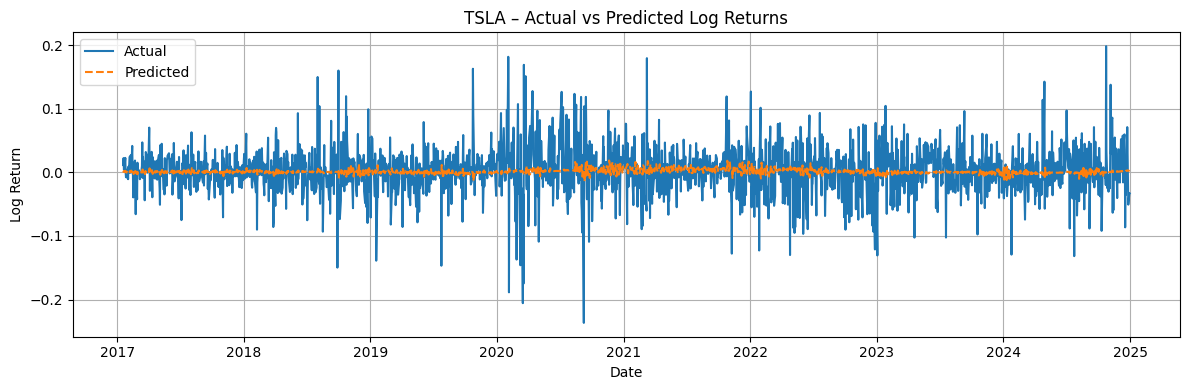

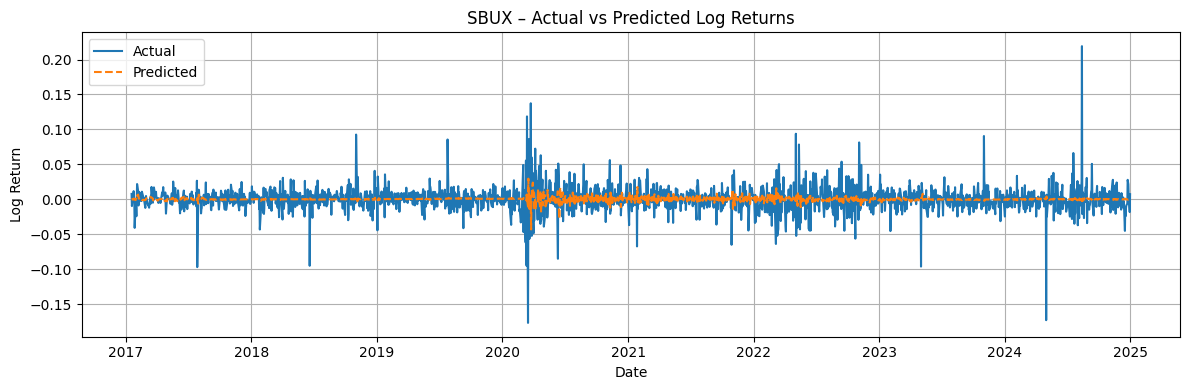

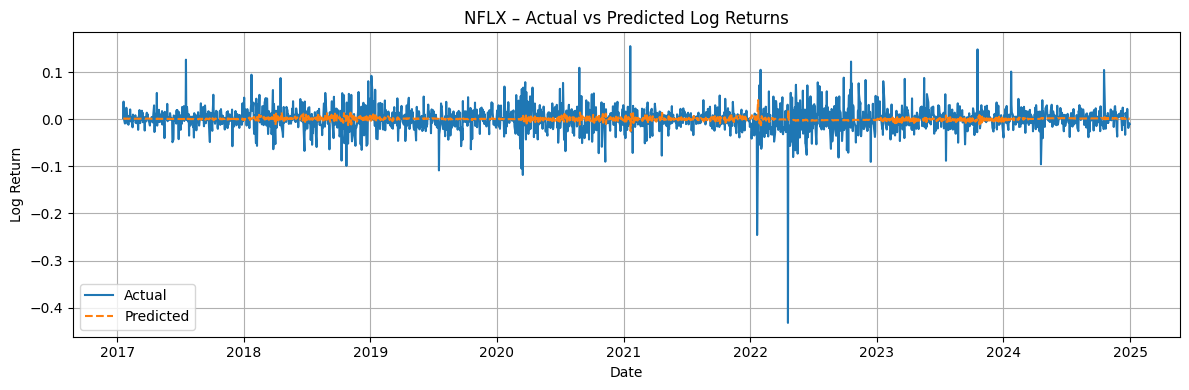

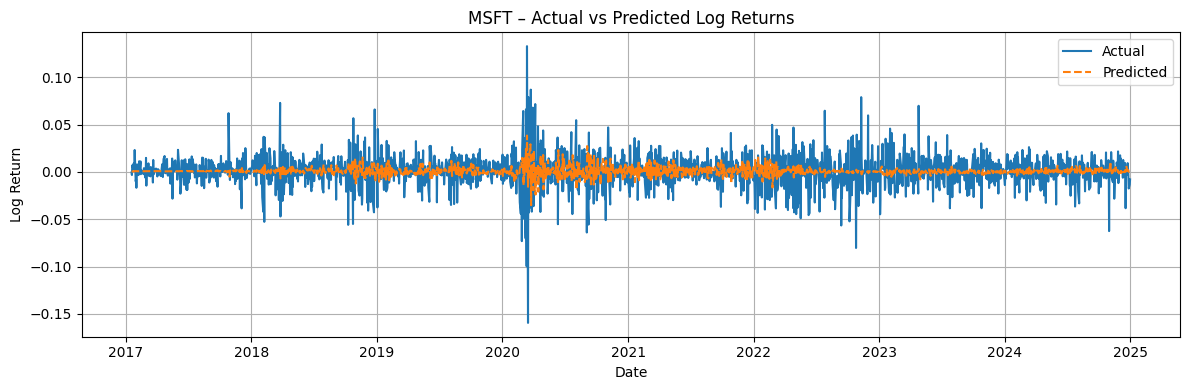

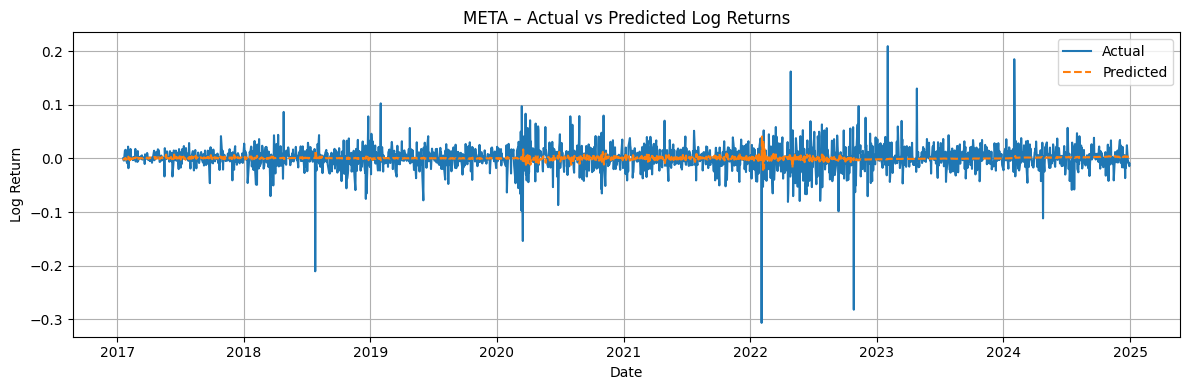

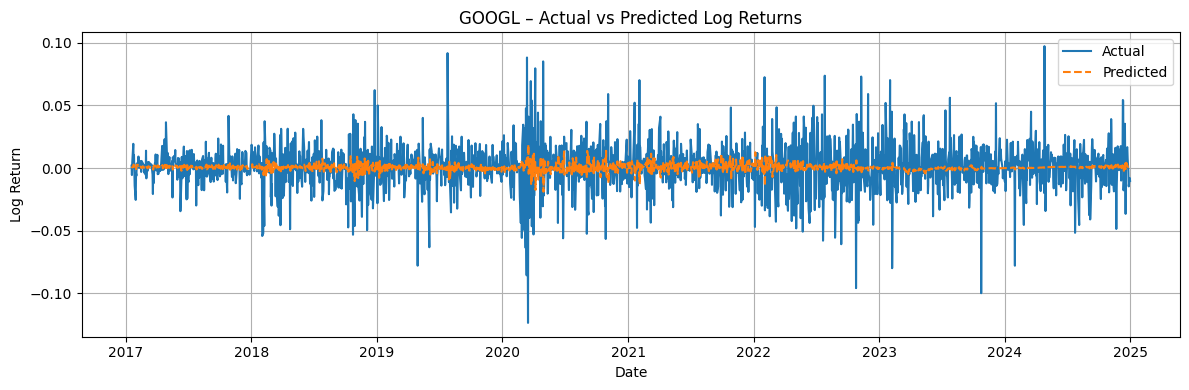

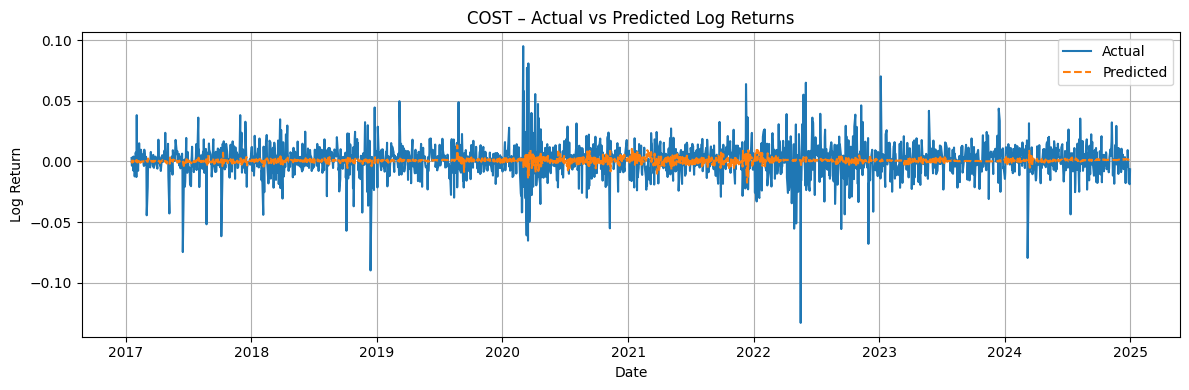

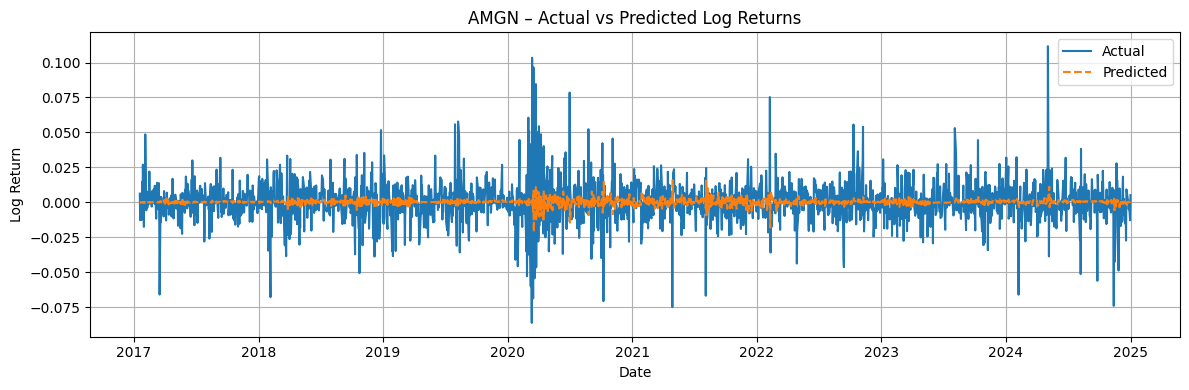

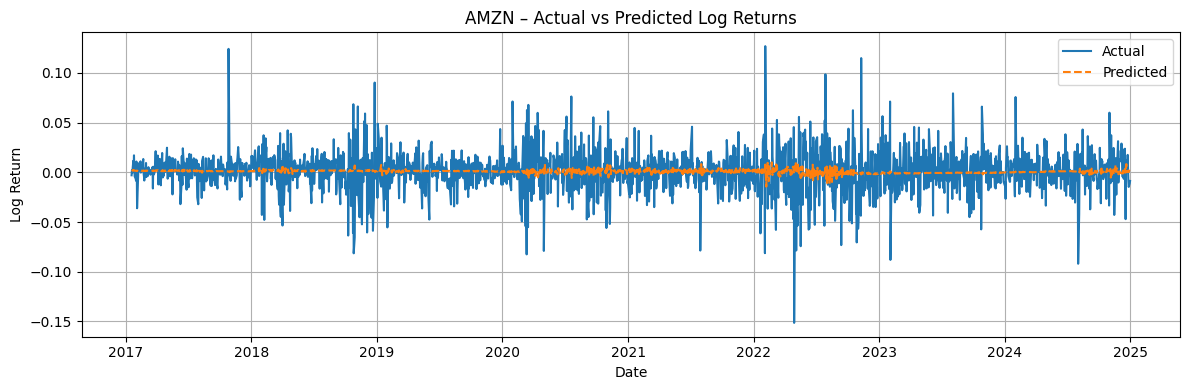

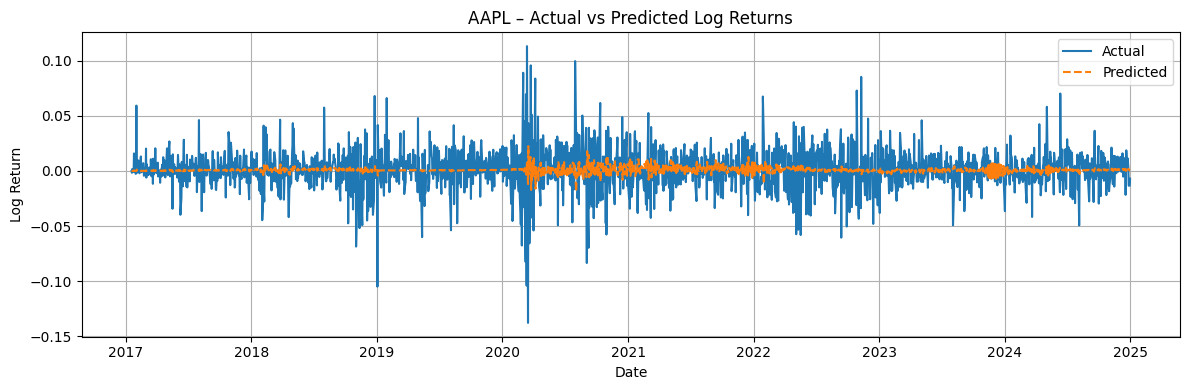

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load actual and predicted data
log_returns = pd.read_csv("aligned_nasdaq10_log_returns.csv", parse_dates=["Date"], index_col="Date")
forecasts = pd.read_csv("merged_arima_forecasts.csv", parse_dates=["Date"], index_col="Date")

# 🔁 Loop through each forecast column
for col in forecasts.columns:
    stock = col.replace("_forecast", "")

    if stock not in log_returns.columns:
        continue

    # Align dates
    actual = log_returns[stock].loc[forecasts.index]
    predicted = forecasts[col]

    # Drop NaNs
    valid_idx = (~actual.isna()) & (~predicted.isna())
    actual = actual[valid_idx]
    predicted = predicted[valid_idx]
    dates = forecasts.index[valid_idx]

    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(dates, actual, label="Actual", linewidth=1.5)
    plt.plot(dates, predicted, label="Predicted", linestyle='--', linewidth=1.5)
    plt.title(f"{stock} – Actual vs Predicted Log Returns")
    plt.xlabel("Date")
    plt.ylabel("Log Return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()